In [1]:
# Capstone Project - Walmart
# Gaurav Singh - grv08singh@gmail.com

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [52]:
df = pd.read_csv("Walmart DataSet.csv")

In [53]:
df.sample(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1914,14,25-02-2011,1875708.88,0,35.78,3.274,184.162563,8.549
2398,17,16-03-2012,853136.46,0,43.69,3.529,130.826193,6.403
193,2,21-01-2011,1751384.90,0,41.40,3.016,211.486469,8.028


## 1) Data Inspection and Cleaning

In [54]:
df.shape

(6435, 8)

#### There are 6435 rows in raw data with 8 features

In [55]:
df.columns.to_list()

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

#### This is the list of feature names

In [56]:
df.duplicated().sum()

0

#### There are no duplicate rows

In [57]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### There are no null values in the raw dataset

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### Out of 8, one feature is `Object` datatype, two are `Integer` & five are `Float`.
#### Date is in `object` datatype that too in `dd-mm-YYYY` format.
#### We need to change the data type of `Date` feature from `object` to standard `YYYY-mm-dd` `Datetime` format

In [59]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

#### Now, the `Date` feature in standard `Datetime` format

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


#### 1. You are provided with the weekly sales data for their various outlets.
#### Use statistical analysis, 

In [65]:
#Statistical Summary
df.describe(exclude='datetime64').T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [104]:
num_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
cat_features = ['Store','Holiday_Flag']

In [105]:
#Categorical columns unique values
for col in cat_features:
    print(f"Number of unique values in `{col}`: {df[col].nunique()}")
    print(f"Unique values in `{col}` are: {df[col].unique().tolist()}\n")
        

Number of unique values in `Store`: 45
Unique values in `Store` are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]

Number of unique values in `Holiday_Flag`: 2
Unique values in `Holiday_Flag` are: [0, 1]



#### EDA, 

In [151]:
#### EDA
## Univariate Analysis: 
# Mean, Median, Mode, 
# Range, Std, IQR, 
# Countplot, Histograms, Pie Charts, Frequency Polygons

In [107]:
for col in num_features:
    print(f"{col}:")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print(f"Range: {df[col].max() - df[col].min()} = {df[col].min()} to {df[col].max()}")
    print(f"Std: {df[col].std()}")
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    print(f"Range: {Q3 - Q1} = {Q1} to {Q3} \n\n")

Weekly_Sales:
Mean: 1046964.8775617715
Median: 960746.04
Mode: 209986.25
Range: 3608700.2 = 209986.25 to 3818686.45
Std: 564366.6220536974
Range: 866808.5549999999 = 553350.105 to 1420158.66 


Temperature:
Mean: 60.66378243978244
Median: 62.67
Mode: 50.43
Range: 102.2 = -2.06 to 100.14
Std: 18.444932875811585
Range: 27.479999999999997 = 47.46 to 74.94 


Fuel_Price:
Mean: 3.358606837606838
Median: 3.445
Mode: 3.638
Range: 1.996 = 2.472 to 4.468
Std: 0.4590197071928516
Range: 0.802 = 2.933 to 3.735 


CPI:
Mean: 171.57839384878014
Median: 182.6165205
Mode: 126.064
Range: 101.1688068 = 126.064 to 227.2328068
Std: 39.35671229566413
Range: 81.00829345 = 131.735 to 212.74329345 


Unemployment:
Mean: 7.99915104895105
Median: 7.874
Mode: 8.099
Range: 10.434000000000001 = 3.879 to 14.313
Std: 1.8758847818628084
Range: 1.7309999999999999 = 6.891 to 8.622 




#### Univariate Analysis - Countplot of Holidays and Normal Days

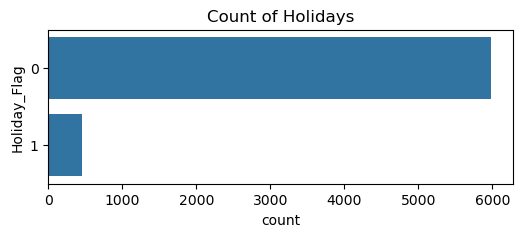

In [124]:
plt.figure(figsize=(6,2))
sns.countplot(data=df, y='Holiday_Flag')
plt.title("Count of Holidays")
plt.show()

#### Univariate Analysis - Histogram and KDE plot of all the numeric features

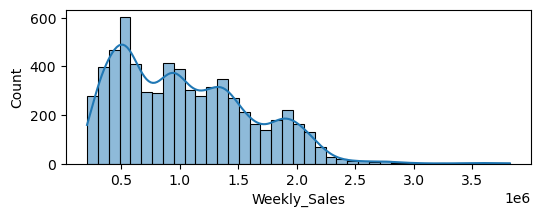

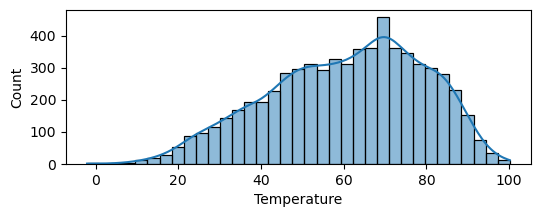

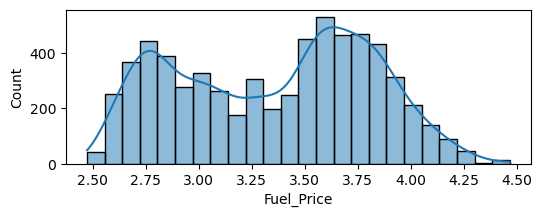

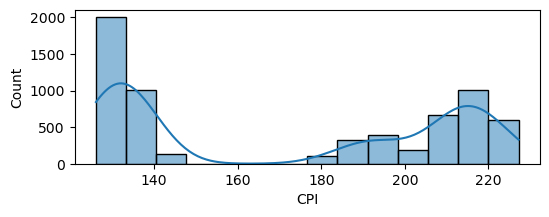

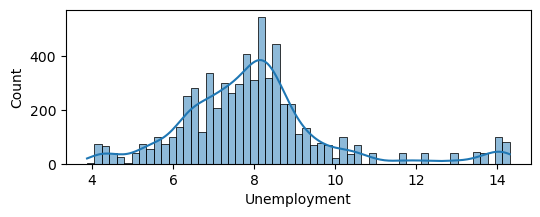

In [133]:
for col in num_features:
    plt.figure(figsize=(6,2))
    sns.histplot(data=df, x=col, kde=True)
    
    plt.show()

#### Univariate Analysis - Pie Chart

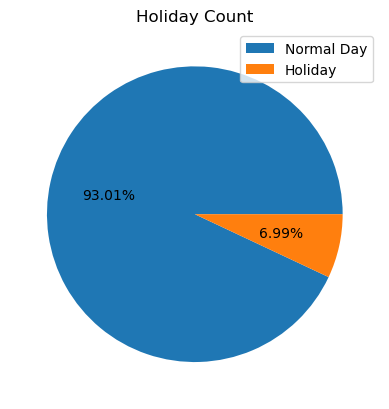

In [150]:
plt.pie(df['Holiday_Flag'].value_counts(), autopct='%1.2f%%')
plt.legend(['Normal Day','Holiday'])
plt.title("Holiday Count")
plt.show()

In [188]:
#### EDA
## Bivariate Analysis: Pair Plot, Scatter Plot

#### Bivariate Analysis - Pair Plot

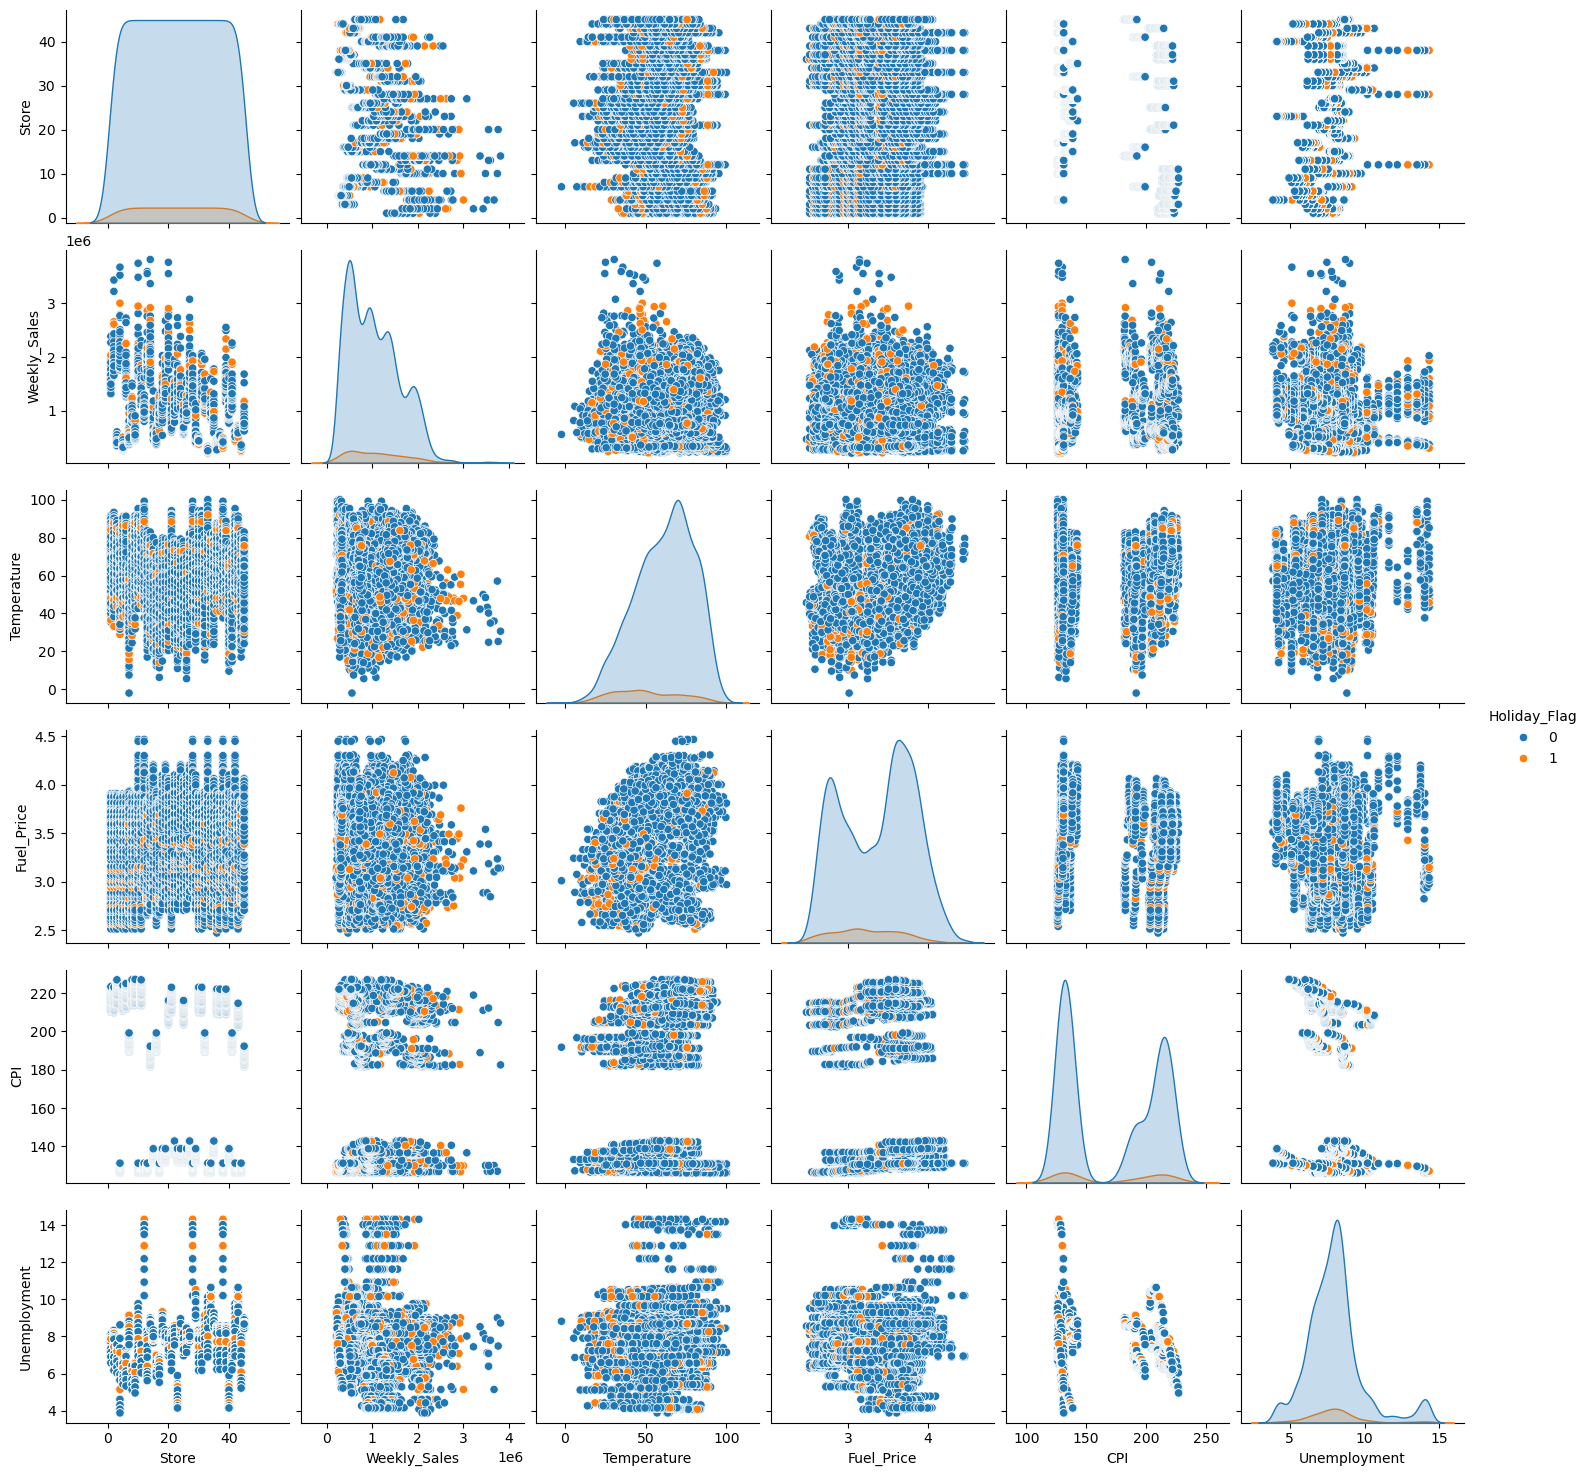

In [192]:
sns.pairplot(df, hue='Holiday_Flag')
plt.show()

#### Bivariate Analysis - Scatter Plot

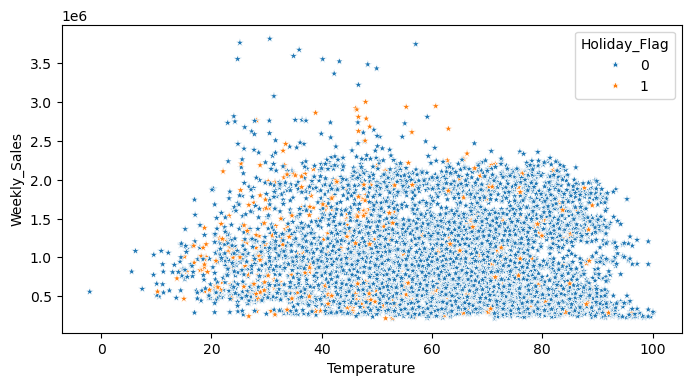

In [187]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', marker='*', hue='Holiday_Flag')
plt.show()

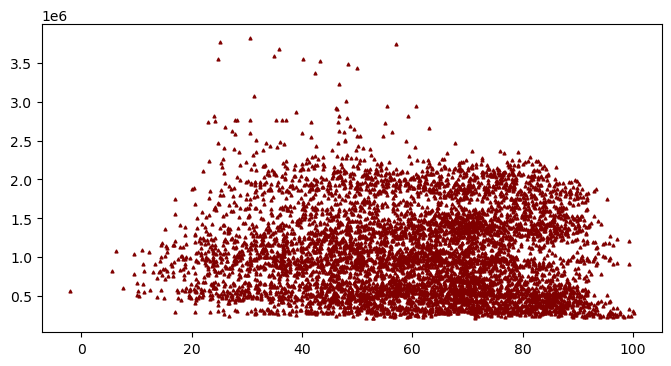

In [197]:
plt.figure(figsize=(8,4))
plt.scatter(x=df['Temperature'], y=df['Weekly_Sales'], marker='^', s=4, c='maroon')
plt.show()

In [153]:
#### EDA
## Multivariate Analysis

#### Multivariate Analysis - heatmap

In [164]:
df1 = df.drop(columns=['Date', 'Holiday_Flag'])
df1.corr()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.335332,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-0.335332,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.022659,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.060023,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.209492,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,0.223531,-0.106176,0.101158,-0.034684,-0.302020,1.000000


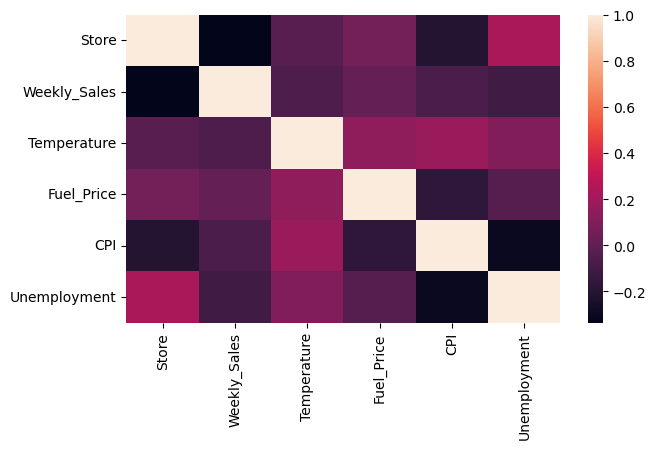

In [170]:
plt.figure(figsize = (7,4))
sns.heatmap(data=df1.corr())
plt.show()

#### outlier analysis, and

#### outlier analysis, and

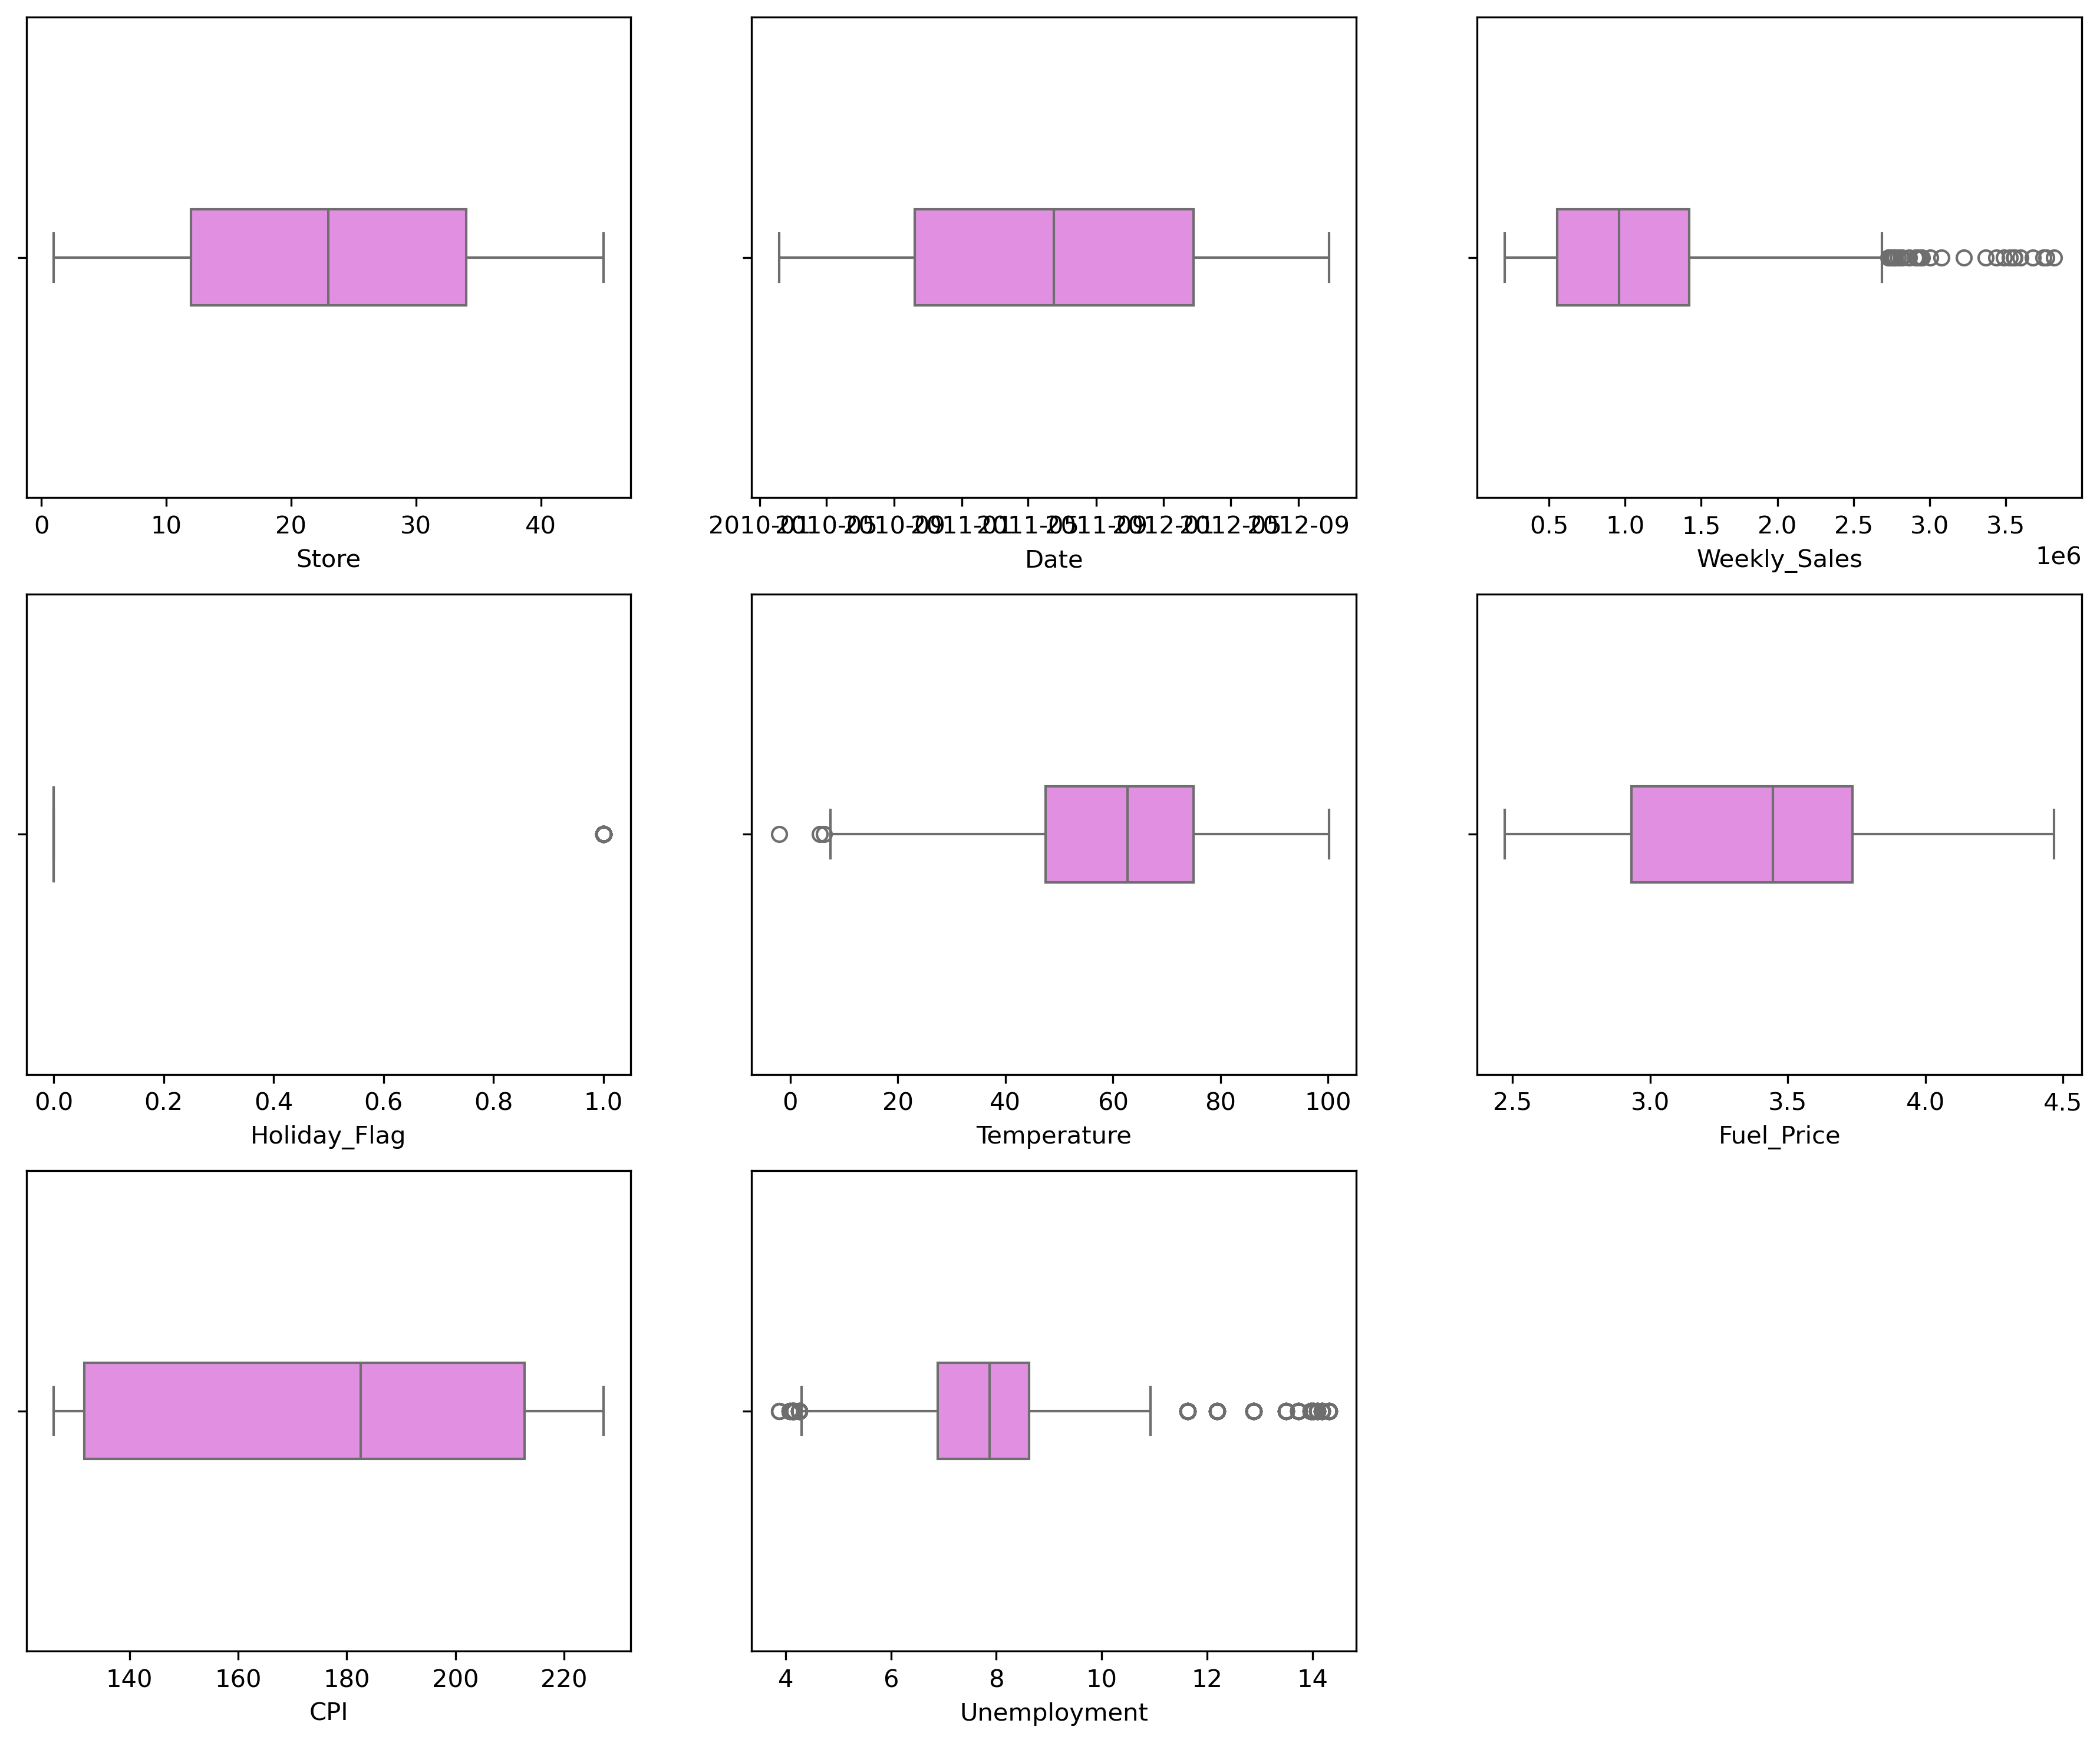

In [75]:
# Outlier Analysis
fig = plt.figure(figsize=(15,12),dpi=300)
i = 1
for col in df.columns:
    if df[col].dtype != 'object':
        plt.subplot(3, 3, i)
        sns.boxplot(data=df, x=col, width=0.2, color='violet')
        # or
        # plt.boxplot(x=df[col])
        # plt.title(col)
        i += 1
plt.show()

In [ ]:
#Removing Outliers:
initial_size = df.shape[0]
for col in df.columns:
    if(df[col].dtype in ('int64', 'float64')):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        LB = Q1 - 1.5 * (IQR)
        UB = Q3 + 1.5 * (IQR)
        df = df[ (df[col] >= LB) & (df[col] <= UB) ]
final_size = df.shape[0]
print(f"rows removed: {initial_size - final_size}")

#### handle the missing values to 
#### come up with various insights that can give them a clear perspective on the following:

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])

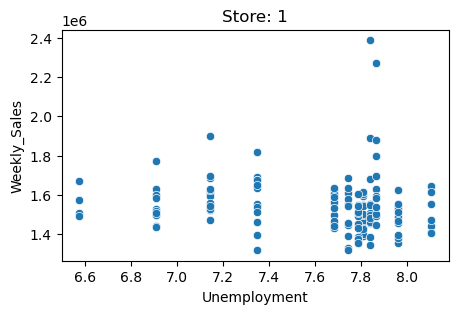

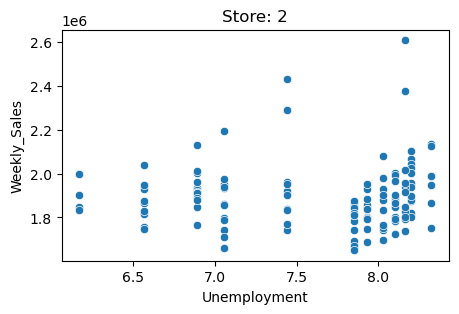

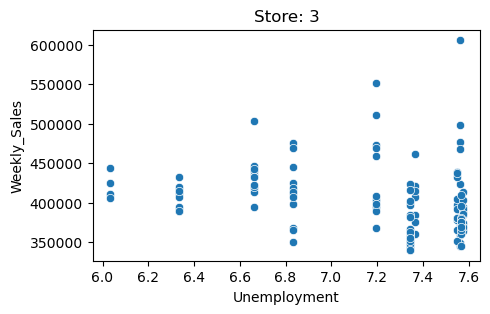

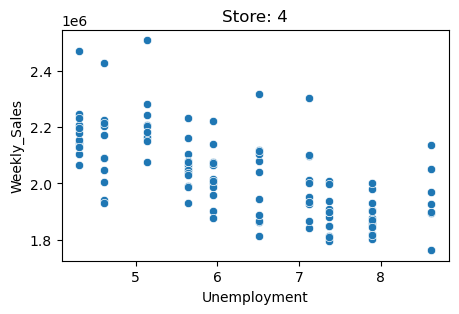

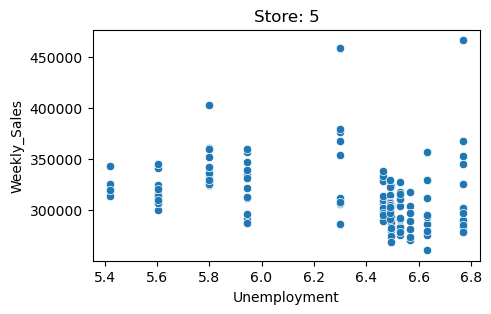

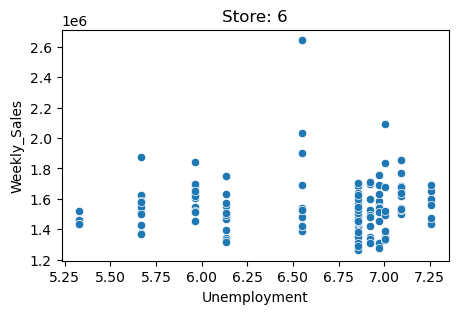

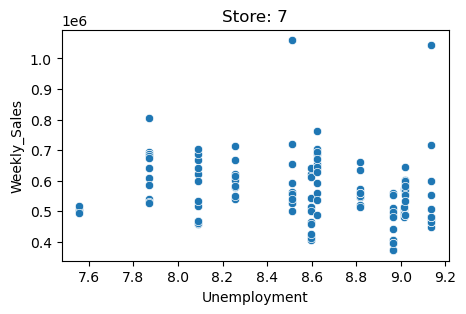

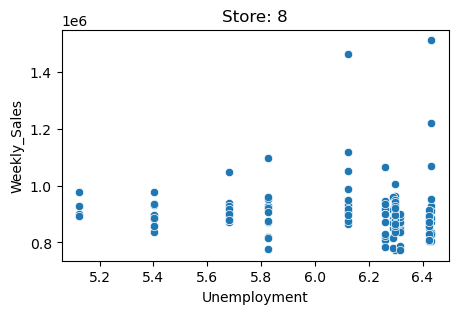

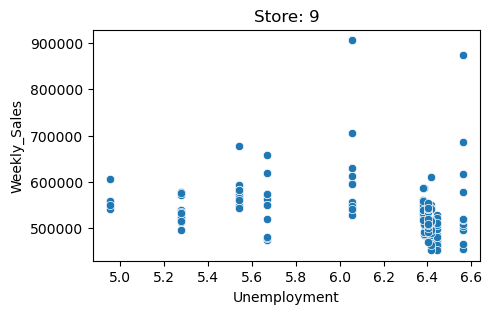

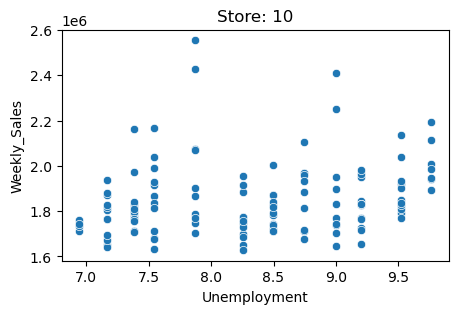

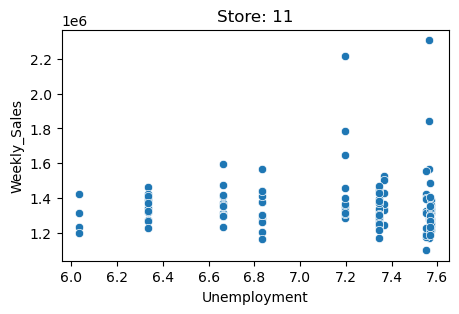

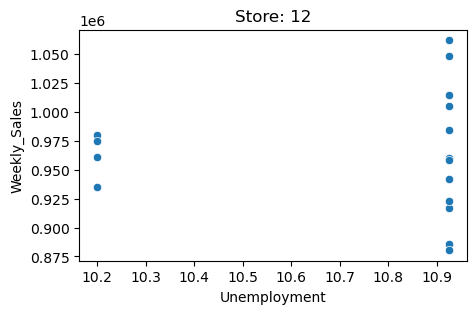

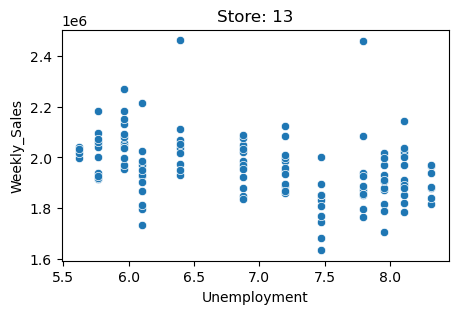

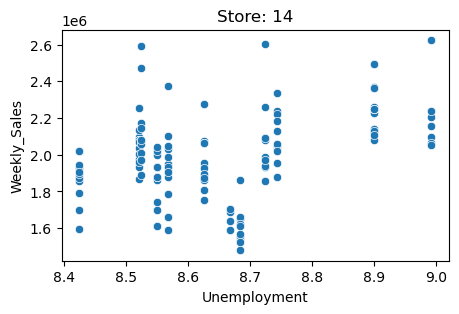

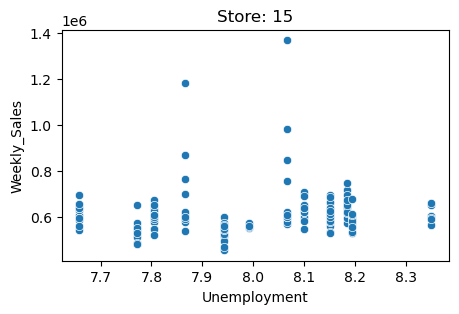

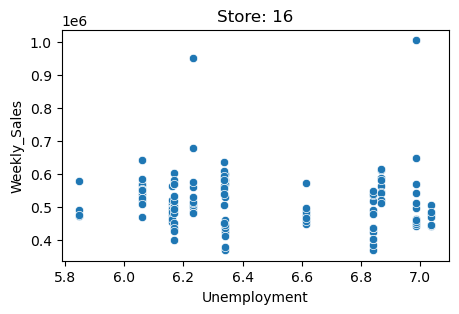

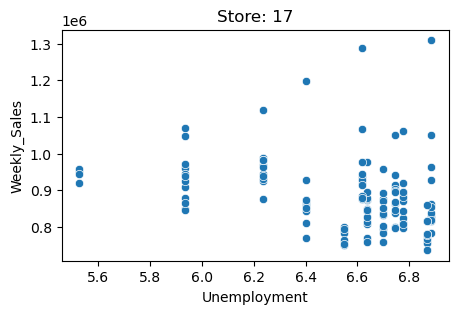

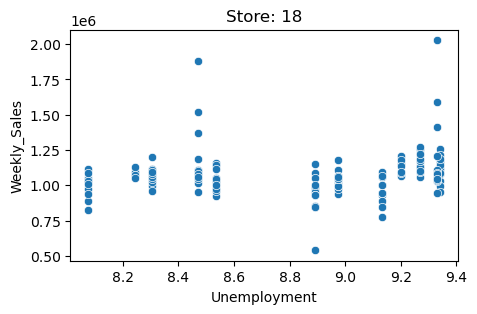

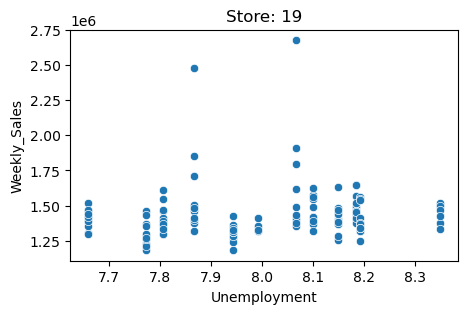

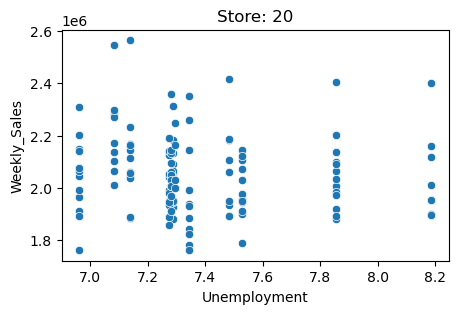

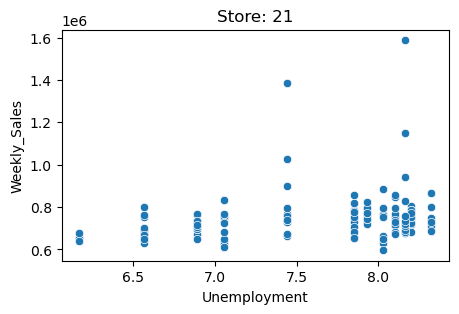

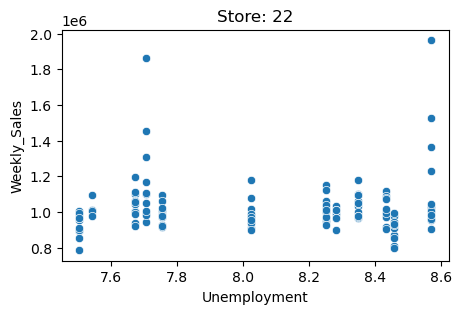

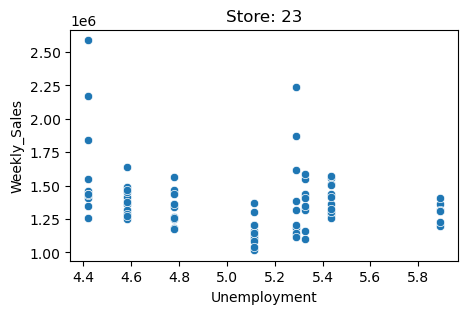

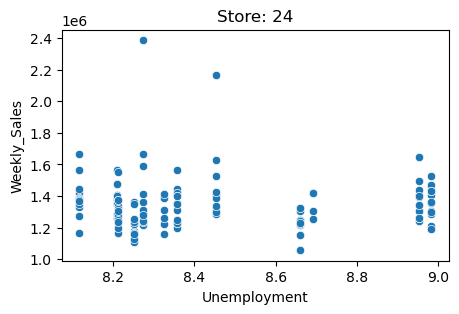

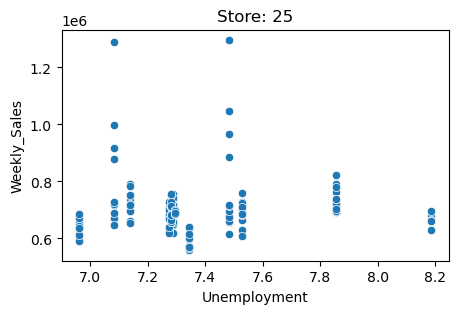

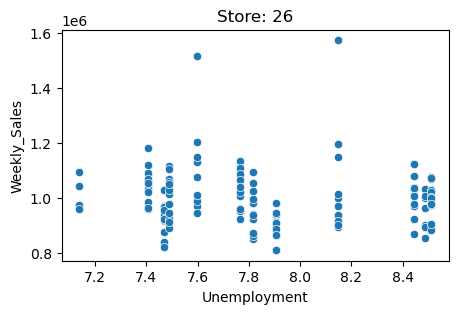

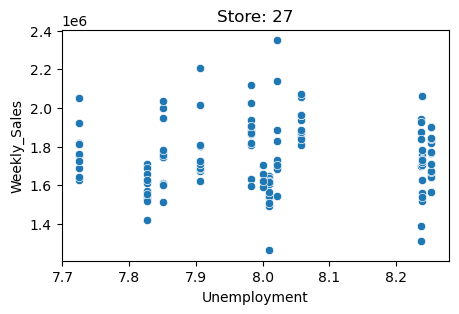

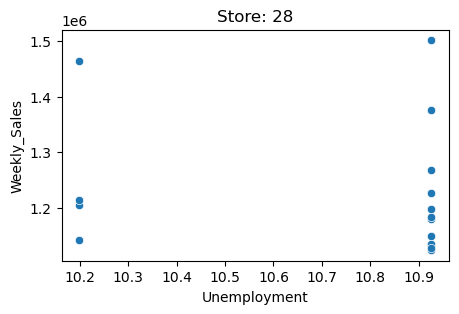

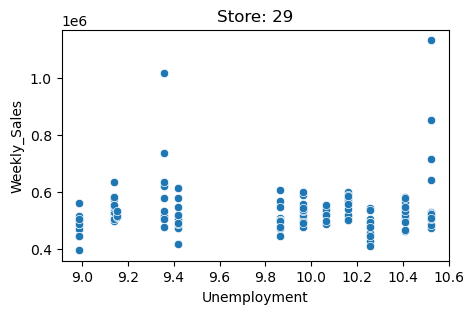

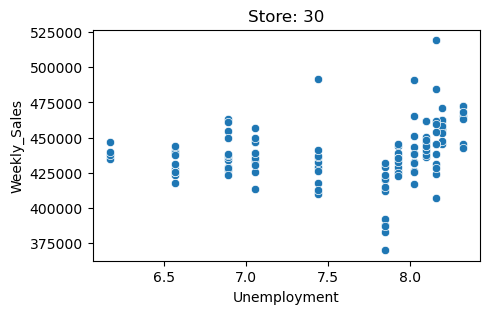

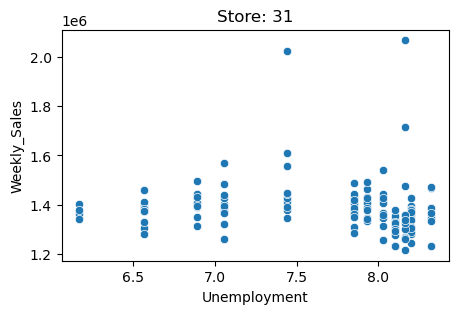

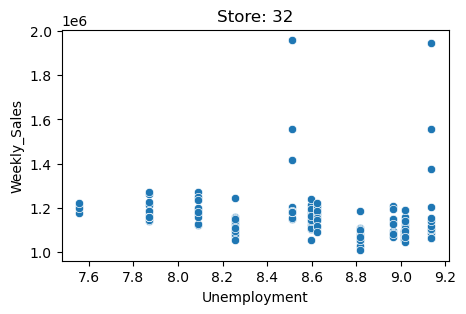

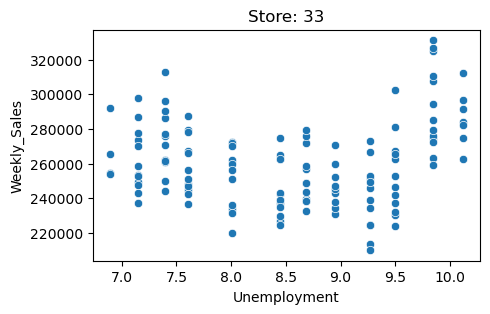

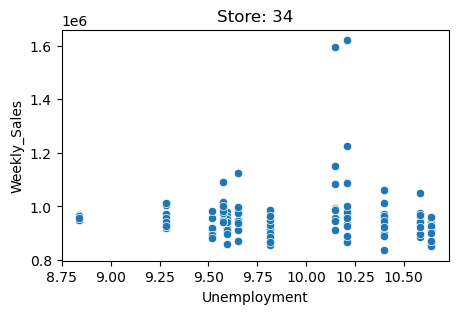

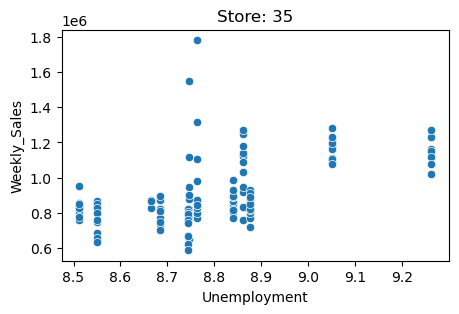

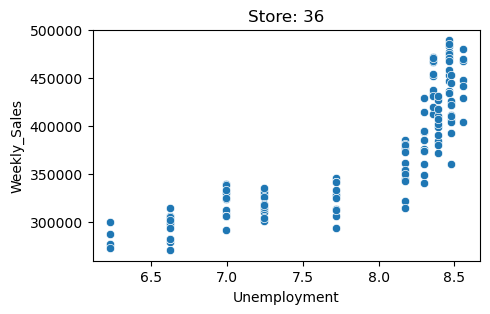

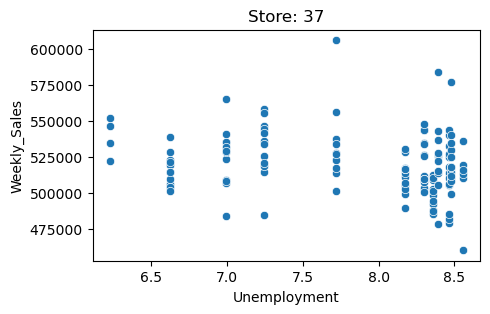

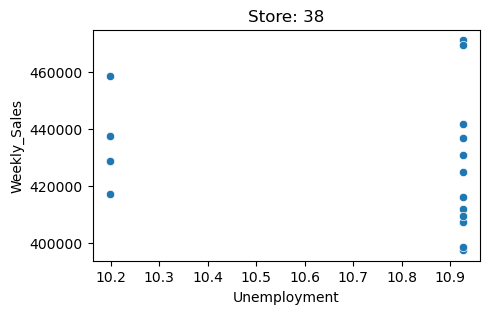

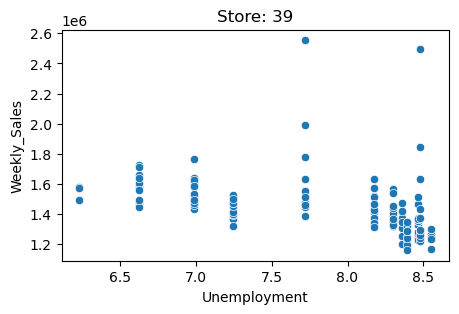

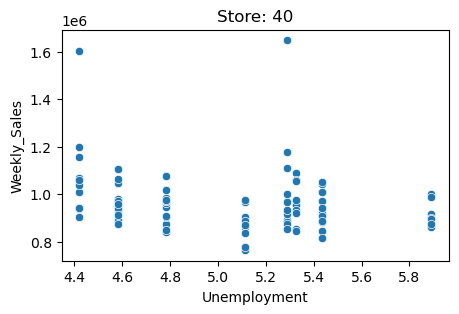

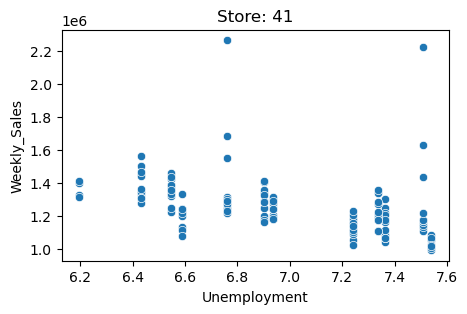

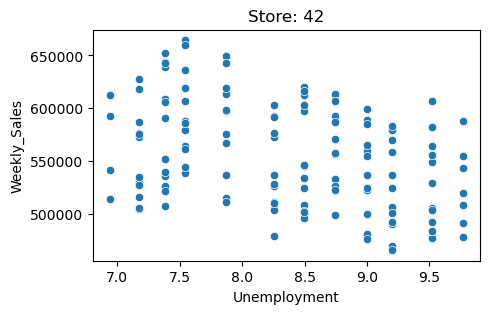

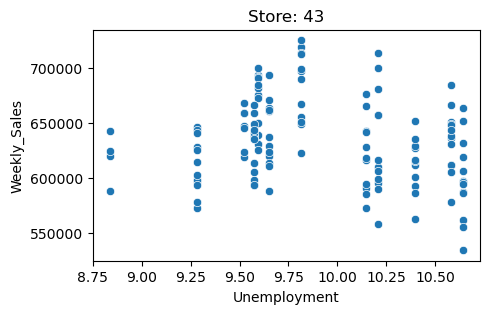

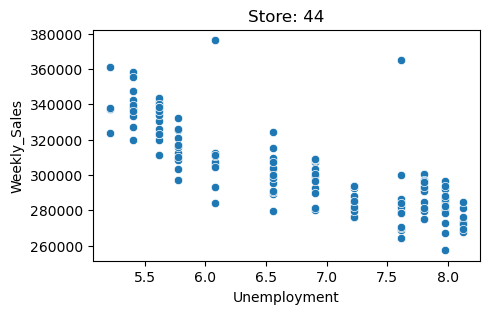

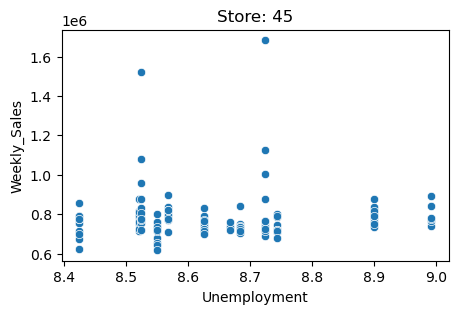

In [351]:
# a. If the weekly sales are affected by the unemployment rate, if yes - which stores
# are suffering the most?
i = 0
for store in df['Store'].unique():
    fig = plt.figure(figsize=(5,3),dpi=100)
    sns.scatterplot(data=df[df['Store'] == store], x='Unemployment', y='Weekly_Sales')
    plt.title(f'Store: {store}')
    plt.show()

In [ ]:
# b. If the weekly sales show a seasonal trend, when and what could be the reason?


In [ ]:
# c. Does temperature affect the weekly sales in any manner?


In [ ]:
# d. How is the Consumer Price index affecting the weekly sales of various stores?


In [ ]:
# e. Top performing stores according to the historical data.


In [ ]:
# f. The worst performing store, and how significant is the difference between the
# highest and lowest performing stores.


In [ ]:
# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.